# SpaCy

https://www.kaggle.com/zackakil/done-nlp-using-word-vectors-with-spacy-cldspn

Spacy helps us know more about the text. What do the words mean in context? Who is doing what to whom? What companies and products are mentioned? Which texts are similar to each other?

spaCy offers tokenization, sentence boundary detection, POS tagging, NER, syntactic parsing (and chunking, as a subset of this), integrated word vectors, and alignment into the original string.

When you call nlp on a text in spaCy, 1.spaCy first tokenizes the text to produce a Doc object. 2.The Doc is then processed in several different steps – this is also referred to as the processing pipeline. The pipeline used by the default models consists of a tagger, a parser and an entity recognizer. Each pipeline component returns the processed Doc, which is then passed on to the next component

In [1]:
import spacy
nlp = spacy.load("en_core_web_sm") # Load the installed model "en_core_web_sm"
#nlp = spacy.load('en') # install 'en' model 

ModuleNotFoundError: No module named 'spacy'

The central data structures in spaCy are the Doc and the Vocab. The Doc object owns the sequence of tokens and all their annotations. The Vocab object owns a set of look-up tables that make common information available across documents. By centralizing strings, word vectors and lexical attributes, we avoid storing multiple copies of this data. This saves memory, and ensures there’s a single source of truth.

In [32]:
doc = nlp("""All human beings are born free and equal in dignity and rights. 
             They are endowed with reason and conscience and should act towards one another in a spirit of brotherhood. 
             Everyone has the right to life, liberty and security of person.""")

# Sentences

In [13]:
for item in doc.sents:
    print (item.text)

All human beings are born free and equal in dignity and rights. 
             
They are endowed with reason and conscience and should act towards one another in a spirit of brotherhood. 
             
Everyone has the right to life, liberty and security of person.


# Word and Lemma

In [29]:
[(word.text,word.lemma_) for word in doc]

[('All', 'all'),
 ('human', 'human'),
 ('beings', 'being'),
 ('are', 'be'),
 ('born', 'bear'),
 ('free', 'free'),
 ('and', 'and'),
 ('equal', 'equal'),
 ('in', 'in'),
 ('dignity', 'dignity'),
 ('and', 'and'),
 ('rights', 'right'),
 ('.', '.'),
 ('\n             ', '\n             '),
 ('They', '-PRON-'),
 ('are', 'be'),
 ('endowed', 'endow'),
 ('with', 'with'),
 ('reason', 'reason'),
 ('and', 'and'),
 ('conscience', 'conscience'),
 ('and', 'and'),
 ('should', 'should'),
 ('act', 'act'),
 ('towards', 'towards'),
 ('one', 'one'),
 ('another', 'another'),
 ('in', 'in'),
 ('a', 'a'),
 ('spirit', 'spirit'),
 ('of', 'of'),
 ('brotherhood', 'brotherhood'),
 ('.', '.'),
 ('\n             ', '\n             '),
 ('Everyone', 'everyone'),
 ('has', 'have'),
 ('the', 'the'),
 ('right', 'right'),
 ('to', 'to'),
 ('life', 'life'),
 (',', ','),
 ('liberty', 'liberty'),
 ('and', 'and'),
 ('security', 'security'),
 ('of', 'of'),
 ('person', 'person'),
 ('.', '.')]

# Parts of speech
The pos_ attribute gives a general part of speech; the tag_ attribute gives a more specific designation

In [26]:
# Coarse-grained part-of-speech tags
[(token.text,token.pos_,token.tag_) for token in doc if not token.is_punct]

[('All', 'DET', 'DT'),
 ('human', 'ADJ', 'JJ'),
 ('beings', 'NOUN', 'NNS'),
 ('are', 'AUX', 'VBP'),
 ('born', 'VERB', 'VBN'),
 ('free', 'ADJ', 'JJ'),
 ('and', 'CCONJ', 'CC'),
 ('equal', 'ADJ', 'JJ'),
 ('in', 'ADP', 'IN'),
 ('dignity', 'NOUN', 'NN'),
 ('and', 'CCONJ', 'CC'),
 ('rights', 'NOUN', 'NNS'),
 ('\n             ', 'SPACE', '_SP'),
 ('They', 'PRON', 'PRP'),
 ('are', 'AUX', 'VBP'),
 ('endowed', 'VERB', 'VBN'),
 ('with', 'ADP', 'IN'),
 ('reason', 'NOUN', 'NN'),
 ('and', 'CCONJ', 'CC'),
 ('conscience', 'NOUN', 'NN'),
 ('and', 'CCONJ', 'CC'),
 ('should', 'VERB', 'MD'),
 ('act', 'VERB', 'VB'),
 ('towards', 'ADP', 'IN'),
 ('one', 'NOUN', 'NN'),
 ('another', 'DET', 'DT'),
 ('in', 'ADP', 'IN'),
 ('a', 'DET', 'DT'),
 ('spirit', 'NOUN', 'NN'),
 ('of', 'ADP', 'IN'),
 ('brotherhood', 'NOUN', 'NN'),
 ('\n             ', 'SPACE', '_SP'),
 ('Everyone', 'PRON', 'NN'),
 ('has', 'AUX', 'VBZ'),
 ('the', 'DET', 'DT'),
 ('right', 'NOUN', 'NN'),
 ('to', 'ADP', 'IN'),
 ('life', 'NOUN', 'NN'),
 ('liber

In [12]:
# Fine-grained part-of-speech tags
[token.tag_ for token in doc]

['NN', 'IN', 'VB', 'TO', 'VB', 'PRP$', 'NN', 'VB', '.']

In [13]:
# Dependency labels
[token.dep_ for token in doc]

['ROOT', 'prep', 'pobj', 'aux', 'advcl', 'poss', 'compound', 'dobj', 'punct']

In [14]:
# Syntactic head token (governor)
[token.head.text for token in doc]

['Progress',
 'Progress',
 'to',
 'make',
 'Progress',
 'count',
 'count',
 'make',
 'Progress']

In [27]:
 # with stopword removal
[token.text for token in doc if not token.is_stop]

['human',
 'beings',
 'born',
 'free',
 'equal',
 'dignity',
 'rights',
 '.',
 '\n             ',
 'endowed',
 'reason',
 'conscience',
 'act',
 'spirit',
 'brotherhood',
 '.',
 '\n             ',
 'right',
 'life',
 ',',
 'liberty',
 'security',
 'person',
 '.']

# Entity

In [15]:
doc = nlp("Steve Jobs founded Apple")
# Text and label of named entity span
[(ent.text, ent.label_) for ent in doc.ents]

[('Steve Jobs', 'PERSON'), ('Apple', 'ORG')]

# Word Vectors

In [42]:
# Vector as a numpy array
doc = nlp("I like cats")

# The L2 norm of the token's vector
doc[1].vector


array([-0.19226086,  1.3479431 ,  1.5994587 , -3.6445966 , -1.5558245 ,
        2.554374  , -0.7620152 ,  0.46970728,  2.0037389 ,  1.3284994 ,
       -0.82508373,  0.28390783, -0.4498567 ,  5.529961  ,  2.3360288 ,
        1.1068658 , -0.49503398, -2.0300398 , -1.1439992 , -1.0690049 ,
       -2.0487876 ,  2.3721743 , -0.93661946,  1.2563736 ,  4.853875  ,
        0.8897501 , -0.7085593 , -4.4823856 ,  2.784761  ,  3.9698932 ,
       -1.9303994 ,  0.882258  , -1.4591478 ,  2.429068  , -1.2049868 ,
       -0.05764058, -0.65097666, -0.2921309 ,  2.5911472 , -2.3638225 ,
       -0.22735597,  1.6765239 , -0.09689248, -2.6439712 ,  1.5284287 ,
       -3.7777162 ,  3.2912784 ,  0.10673183, -0.16672605, -1.6205859 ,
        0.8141889 , -1.9798925 , -0.37664223, -0.2321173 , -4.1553807 ,
       -2.9800878 , -0.10232732, -2.0630462 ,  1.8387524 ,  2.1590588 ,
        6.4300413 , -1.3666265 , -3.5032754 , -2.8964083 , -3.7037477 ,
       -0.28970873, -2.4672124 , -0.12548643,  0.751009  , -2.47

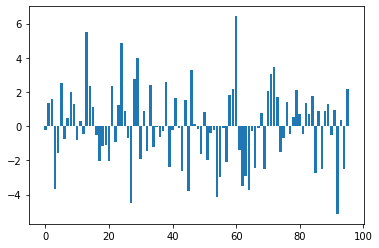

In [47]:
# visualizig the vecotr
import matplotlib.pyplot as plt
plt.bar(range(96), doc[1].vector)
plt.show()

In [18]:
doc[2].vector_norm

21.84148

In [20]:
def cleanData(doc,stemming = False):
    doc = doc.lower()
    doc = nlp(doc)
    tokens = [tokens.lower_ for tokens in doc]
    tokens = [tokens for tokens in doc if (tokens.is_stop == False)]
    tokens = [tokens for tokens in tokens if (tokens.is_punct == False)]
    final_token = [token.lemma_ for token in tokens]
    
    return " ".join(final_token)

In [22]:
doc = " this is new America where we live"

cleanData(doc)

'  new america live'

# Document similarity

spaCy can compare two objects and predict similarity. In order to use similarity, you need a larger spaCy model that has word vectors included.

For example, the medium or large English model – but not the small one. So if you want to use vectors, always go with a model that ends in "md" or "lg".




In [26]:
#nlp = spacy.load('en_core_web_lg')

doc1 = nlp("My name is shyam")
doc2 = nlp("My name is Ram")

doc1.similarity(doc2)

C:\ProgramData\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)


0.8506854090340065

In [30]:
texts = [
    "Net income was $9.4 million compared to the prior year of $2.7 million.",
    "Revenue exceeded twelve billion dollars, with a loss of $1b.",
]

nlp = spacy.load("en_core_web_sm")
for doc in nlp.pipe(texts, disable=["tagger", "parser"]):
    # Do something with the doc here
    print([(ent.text, ent.label_) for ent in doc.ents])

[('$9.4 million', 'MONEY'), ('the prior year', 'DATE'), ('$2.7 million', 'MONEY')]
[('twelve billion dollars', 'MONEY'), ('1b', 'MONEY')]


In [31]:
print(nlp.pipeline)

[('tagger', <spacy.pipeline.pipes.Tagger object at 0x0000023555489D08>), ('parser', <spacy.pipeline.pipes.DependencyParser object at 0x0000023555472E88>), ('ner', <spacy.pipeline.pipes.EntityRecognizer object at 0x000002355548F468>)]


In [32]:
print(nlp.pipe_names)

['tagger', 'parser', 'ner']



# Entity extraction
A common task in NLP is taking a text and extracting "named entities" from it—basically, proper nouns, or names of companies, products, locations, etc. You can easily access this information using the .ents property of a document.

NER is the process of extracting Named Entities like Person, Organization, Location and other such infromation from our Text Corpus. spaCy also has an object displacy that lets us visualize our text with NER. We can display Named Entities using the following code:

In [33]:
doc = nlp("John McCain and I visited the Apple Store in Manhattan.")

In [34]:
for item in doc.ents:
    print (item)

John McCain
the Apple Store
Manhattan


In [6]:
for item in doc2.ents:
    print (item.text, item.label_)

John McCain PERSON
the Apple Store ORG
Manhattan GPE


## spaCy also allows to visualize Named Entities along woith the Text Labels.

In [35]:
spacy.displacy.render(doc, style='ent',jupyter=True)

In [36]:
spacy.displacy.render(doc, style='dep',jupyter=True)